## PyCaret: Anatomy of Classification


### Task 1: Import Data, Initial dataset check and setup Pycaret(install and set up environment)

In [ ]:
# Mounting Google Drive
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
import pandas as pd

In [ ]:
# Importing Data from Local System
from google.colab import files
uploaded = files.upload()

Saving bank.csv to bank (2).csv


In [ ]:
# importing the data
df1 = pd.read_csv('bank.csv', sep=";")

In [ ]:
# Original code
# df1 = pd.read_csv('bank.csv', sep=";")

In [ ]:
df1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [ ]:
df1.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [ ]:
#looking for any missing value in any feature
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [ ]:
#including categorical feautres as well
df1.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,4521.000000,4521,4521,4521,4521,4521.000000,4521,4521,4521,4521.000000,4521,4521.000000,4521.000000,4521.000000,4521.000000,4521,4521
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,management,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,969,2797,2306,4445,NaN,2559,3830,2896,NaN,1398,NaN,NaN,NaN,NaN,3705,4000
mean,41.170095,NaN,NaN,NaN,NaN,1422.657819,NaN,NaN,NaN,15.915284,NaN,263.961292,2.793630,39.766645,0.542579,NaN,NaN
std,10.576211,NaN,NaN,NaN,NaN,3009.638142,NaN,NaN,NaN,8.247667,NaN,259.856633,3.109807,100.121124,1.693562,NaN,NaN
min,19.000000,NaN,NaN,NaN,NaN,-3313.000000,NaN,NaN,NaN,1.000000,NaN,4.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,69.000000,NaN,NaN,NaN,9.000000,NaN,104.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,444.000000,NaN,NaN,NaN,16.000000,NaN,185.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,49.000000,NaN,NaN,NaN,NaN,1480.000000,NaN,NaN,NaN,21.000000,NaN,329.000000,3.000000,-1.000000,0.000000,NaN,NaN


In [ ]:
#latest version of PyCaret
! pip install pycaret==2.0

     |████████████████████████████████| 256kB 5.5MB/s 
     |████████████████████████████████| 102kB 8.7MB/s 
     |████████████████████████████████| 276kB 17.4MB/s 
     |████████████████████████████████| 66.2MB 60kB/s 
     |████████████████████████████████| 6.8MB 37.0MB/s 
     |████████████████████████████████| 266kB 45.5MB/s 
     |████████████████████████████████| 1.8MB 39.6MB/s 
     |████████████████████████████████| 61kB 8.3MB/s 
     |████████████████████████████████| 13.9MB 42.5MB/s 
     |████████████████████████████████| 1.6MB 40.8MB/s 
     |████████████████████████████████| 2.1MB 34.8MB/s 
     |████████████████████████████████| 604kB 28.6MB/s 
     |████████████████████████████████| 3.1MB 34.4MB/s 
     |████████████████████████████████| 71kB 9.4MB/s 
     |████████████████████████████████| 71kB 8.8MB/s 
     |████████████████████████████████| 71kB 8.5MB/s 
     |████████████████████████████████| 245kB 34.5MB/s 
     |████████████████████████████████| 61kB 7.2MB/s 
    

#### Lonk to Classification Documention of PyCaret https://pycaret.org/classification/

In [ ]:
#becuase we are working on classification task
from pycaret.classification import *

In [ ]:
#setting up the session
# target: the output
# sesion_id: to replicate our work easily
# normalize_method: the method used to normalize the data if is required
session_1 = setup(df1, target = 'y', session_id=123, log_experiment=False, normalize=True, normalize_method='zscore', 
                  transformation=True, transformation_method = 'quantile', experiment_name='bank_1')

Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Target Type,Binary
2,Label Encoded,"no: 0, yes: 1"
3,Original Data,"(4521, 17)"
4,Missing Values,False
5,Numeric Features,7
6,Categorical Features,9
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


### Task 2: Compare model performance

In [ ]:
#comparing for best performing models, fold set to 4, by default it runs a 10 fold Cv.
# blacklist parameter is used to exclude models
# The best model perfomance has the higher accuracy
# In this case, the best two are 'Extreme Gradient Boosting' and 'Gradient Boosting Classifier'.
best_model = compare_models(blacklist=['catboost'], fold=4)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Extreme Gradient Boosting,0.8982,0.8899,0.3150,0.6130,0.4158,0.3665,0.3911,0.3155
1,Gradient Boosting Classifier,0.8979,0.8955,0.3479,0.5951,0.4381,0.3866,0.4038,0.5483
2,Light Gradient Boosting Machine,0.8979,0.8937,0.3753,0.5880,0.4577,0.4046,0.4172,0.1195
3,Logistic Regression,0.8960,0.8852,0.3013,0.5993,0.4009,0.3507,0.3757,0.0909
4,Ada Boost Classifier,0.8941,0.8751,0.3561,0.5632,0.4360,0.3809,0.3933,0.2213
5,Linear Discriminant Analysis,0.8916,0.8819,0.2904,0.5574,0.3816,0.3286,0.3498,0.0397
6,Ridge Classifier,0.8906,0.0000,0.1507,0.6043,0.2407,0.2042,0.2630,0.0169
7,Random Forest Classifier,0.8894,0.8451,0.1944,0.5452,0.2858,0.2413,0.2792,0.1146
8,Extra Trees Classifier,0.8884,0.8611,0.1890,0.5435,0.2780,0.2335,0.2728,0.3548
9,K Neighbors Classifier,0.8865,0.7429,0.1535,0.5285,0.2374,0.1958,0.2404,0.0171


In [ ]:
#naming convention of all models for classification is shown here
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors.KNeighborsClassifier,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model.SGDClassifier,True
rbfsvm,SVM - Radial Kernel,sklearn.svm.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process.GPC,False
mlp,MLP Classifier,sklearn.neural_network.MLPClassifier,False
ridge,Ridge Classifier,sklearn.linear_model.RidgeClassifier,True


### Task 3: Create best performing models

In [ ]:
#light GBM Model
lgbm = create_model('lightgbm', fold=4)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8812,0.8752,0.2747,0.4717,0.3472,0.2868,0.2995
1,0.9001,0.8809,0.4176,0.5938,0.4903,0.4368,0.4451
2,0.9077,0.9139,0.4176,0.6552,0.5101,0.4619,0.4762
3,0.9027,0.9047,0.3913,0.6316,0.4832,0.4327,0.4479
Mean,0.8979,0.8937,0.3753,0.5880,0.4577,0.4046,0.4172
SD,0.0100,0.0161,0.0590,0.0707,0.0645,0.0689,0.0690


In [ ]:
#gradient boosting tree
gbc = create_model('gbc', fold=4)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8900,0.8843,0.2747,0.5435,0.3650,0.3118,0.3337
1,0.8951,0.8785,0.3187,0.5800,0.4113,0.3591,0.3785
2,0.9115,0.9179,0.4396,0.6780,0.5333,0.4869,0.5009
3,0.8951,0.9015,0.3587,0.5789,0.4430,0.3885,0.4021
Mean,0.8979,0.8955,0.3479,0.5951,0.4381,0.3866,0.4038
SD,0.0081,0.0154,0.0607,0.0501,0.0616,0.0641,0.0612


In [ ]:
#extreme gradient boosting 
xgboost = create_model('xgboost', fold=4)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8875,0.8849,0.2527,0.5227,0.3407,0.2873,0.3101
1,0.9001,0.8737,0.3077,0.6364,0.4148,0.3674,0.3965
2,0.9027,0.9062,0.3516,0.6400,0.4539,0.4054,0.4274
3,0.9027,0.8948,0.3478,0.6531,0.4539,0.4059,0.4302
Mean,0.8982,0.8899,0.3150,0.6130,0.4158,0.3665,0.3911
SD,0.0063,0.0120,0.0398,0.0525,0.0462,0.0483,0.0486


### Task 4: Hyper Parameter tuning the model

In [ ]:
#tuning
tuned_lgbm = tune_model(lgbm, fold=4)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8837,0.8728,0.2747,0.4902,0.3521,0.2938,0.3087
1,0.8913,0.8600,0.2637,0.5581,0.3582,0.3070,0.3330
2,0.9064,0.8965,0.3846,0.6604,0.4861,0.4386,0.4580
3,0.8951,0.8844,0.3261,0.5882,0.4196,0.3671,0.3864
Mean,0.8941,0.8784,0.3123,0.5742,0.4040,0.3516,0.3715
SD,0.0082,0.0136,0.0479,0.0611,0.0543,0.0573,0.0573


In [ ]:
#checking parameters
lgbm

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

### Task 5: Stacking, Blending & Ensemble multiple models
- **Stacking:** A learning technique that combines multiple classification or regression models via meta model. The base model are trained based on a complete training set, then the meta model is trained on the output of these base level models as feature.
- **Ennsamble:** Is a techinque that creates multiple models and then combined them to produce improved results, usually produces more accurate solutions than a single model would.
- **Blending:** A function that creates a soft voting or majority rule classifier from all the estimators in the list.

In [ ]:
stacked_lgbm = stack_models(estimator_list = [tuned_lgbm, xgboost, gbc],
                           meta_model=lgbm, fold=4)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8862,0.8722,0.1978,0.5143,0.2857,0.2369,0.2692
1,0.8900,0.8680,0.3297,0.5357,0.4082,0.3513,0.3639
2,0.9102,0.8980,0.4176,0.6786,0.5170,0.4706,0.4875
3,0.8951,0.8869,0.3370,0.5849,0.4276,0.3744,0.3917
Mean,0.8954,0.8813,0.3205,0.5784,0.4096,0.3583,0.3781
SD,0.0091,0.0119,0.0788,0.0633,0.0825,0.0831,0.0778


In [ ]:
en_mod = ensemble_model(lgbm, n_estimators = 10, fold=4)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8862,0.8974,0.2418,0.5116,0.3284,0.2748,0.2980
1,0.8951,0.8957,0.2967,0.5870,0.3942,0.3434,0.3675
2,0.9027,0.9176,0.3626,0.6346,0.4615,0.4124,0.4319
3,0.9052,0.9052,0.3261,0.6977,0.4444,0.4000,0.4348
Mean,0.8973,0.9040,0.3068,0.6077,0.4071,0.3577,0.3831
SD,0.0074,0.0086,0.0442,0.0680,0.0518,0.0544,0.0560


In [ ]:
blender = blend_models(estimator_list = [lgbm,gbc,xgboost, en_mod], method = 'soft', fold=4)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8887,0.8900,0.2418,0.5366,0.3333,0.2820,0.3089
1,0.8963,0.8873,0.3297,0.5882,0.4225,0.3705,0.3893
2,0.9064,0.9199,0.3846,0.6604,0.4861,0.4386,0.4580
3,0.9052,0.9076,0.3696,0.6667,0.4755,0.4281,0.4507
Mean,0.8992,0.9012,0.3314,0.6130,0.4294,0.3798,0.4017
SD,0.0072,0.0133,0.0555,0.0538,0.0605,0.0621,0.0599


The results get improved (read the yellow stripe).

### Task 6: Visualize performance

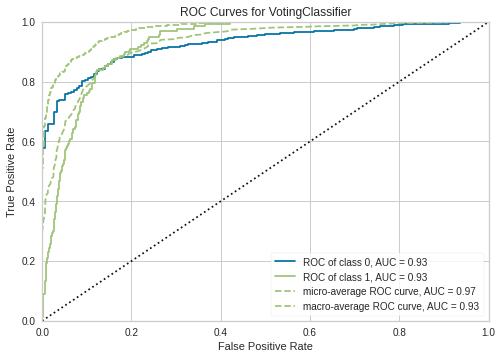

In [ ]:
#AUC Plot: This tell us how much a model is capable of distinguishing between
# and it is plotted tru positive against the false positive. The most capable
# has an AUC equals to 1.
plot_model(blender)

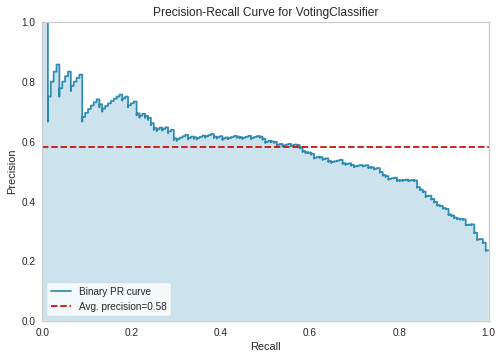

In [ ]:
#precision recall plot: Shows the trade off between precision and recall for
# different thereshold.
# A high area under the curve represents both high recall and high precision.
plot_model(blender, plot='pr')

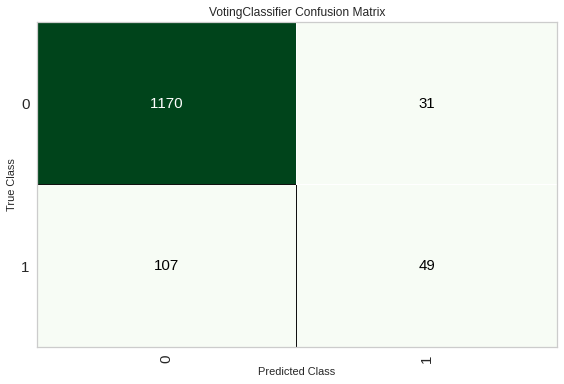

In [ ]:
#confusion matrix
plot_model(blender, plot='confusion_matrix')

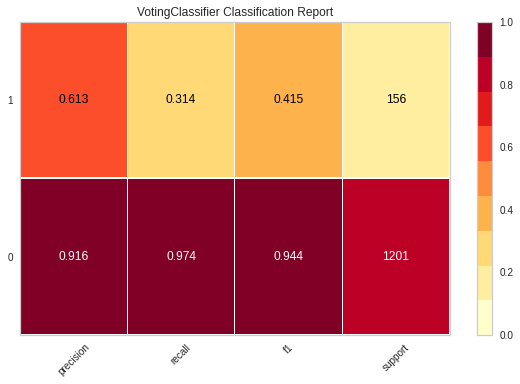

In [ ]:
#classification report
plot_model(blender, plot='class_report')

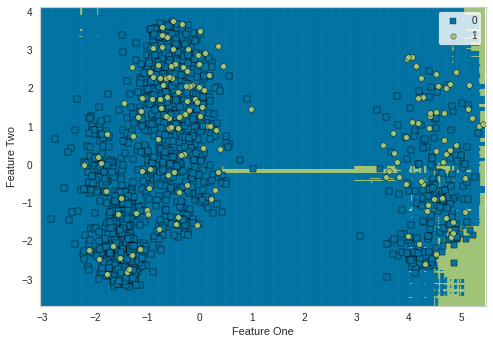

In [ ]:
#visualizing decision boundary
plot_model(blender, plot='boundary')

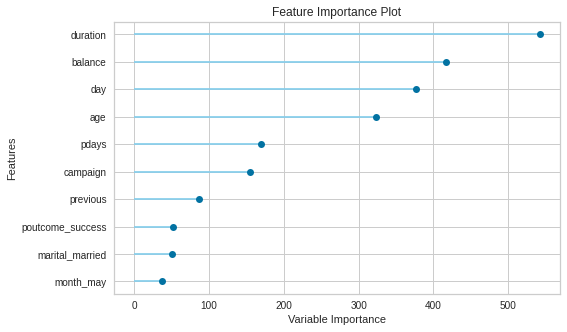

In [ ]:
#feature importance by lgbm: the features provide us the most information
# gain
plot_model(lgbm, plot='feature')

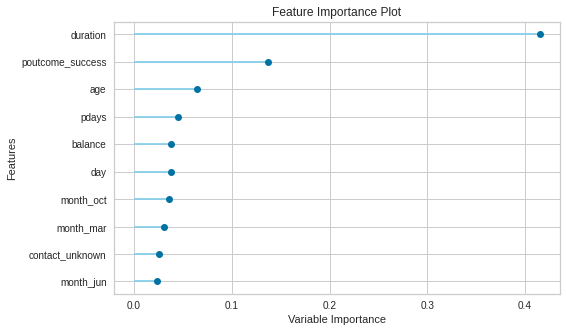

In [ ]:
#feature importance by gbc: we want to drop off models with few feature
# importance and this model has fewer than the previous one.
# For this model duration is very important, the rest are not important.
plot_model(gbc, plot='feature')

In [ ]:
pip install shap

     |████████████████████████████████| 327kB 4.6MB/s 
  Created wheel for shap: filename=shap-0.36.0-cp36-cp36m-linux_x86_64.whl size=456472 sha256=6c467e32871c4d4b700d6724f343820849c6eaf05e9d9fafea4291e2e323971e
  Stored in directory: /root/.cache/pip/wheels/fb/15/e1/8f61106790da27e0765aaa6e664550ca2c50ea339099e799f4
Successfully built shap


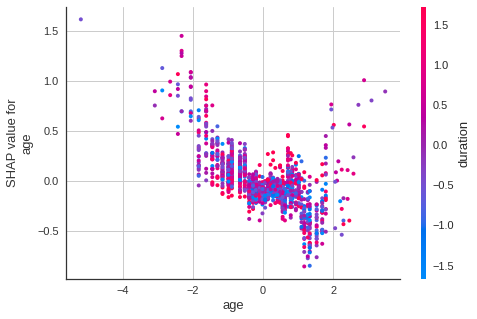

In [ ]:
#feature wise correlation: we will plot one of the feature by correlation
# In this plot, it is appreciated that Age is correlated with the duration,
# since duration was the feature with highest important in both models
interpret_model(lgbm, plot = 'correlation', feature='age')

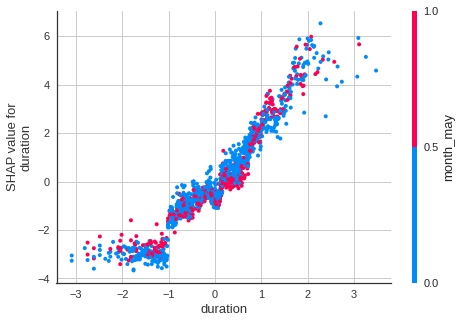

In [ ]:
# We see that the correlation is quite linear.
interpret_model(lgbm, plot = 'correlation', feature='duration')

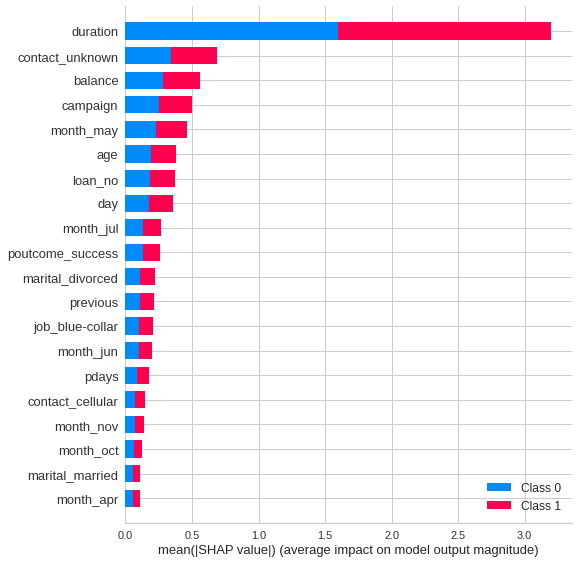

In [ ]:
#model summary: The summary plot give us the importance of our features with
# respect to our target.
# If it would be a multi class classifier, we  could have seen more classes
# here and how these features have impacted on that classification task
interpret_model(lgbm, plot = 'summary')

In [ ]:
#if you want to save the model

save_model(lgbm, 'lgbm_model_1')

Transformation Pipeline and Model Succesfully Saved
